In [1]:
#unsupervised learning
#k means clustring

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# How to determine correct number of clusters(k) ?

In [10]:
df=pd.read_excel('income.xlsx')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michel,29,90000
2,Mohan,29,61000
3,ismail,28,60000
4,kory,42,150000


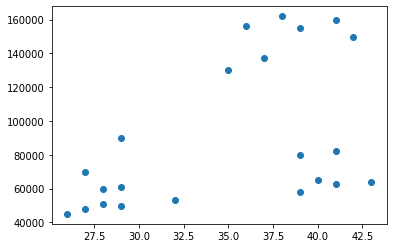

In [13]:
plt.scatter(df['Age'], df['Income'])

In [14]:
km= KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
y_predict=km.fit_predict(df[['Age', 'Income']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
df['cluster']=y_predict
df.head()

,Name,Age,Income,cluter,cluster
0,Rob,27,70000,2,2
1,Michel,29,90000,2,2
2,Mohan,29,61000,0,0
3,ismail,28,60000,0,0
4,kory,42,150000,1,1


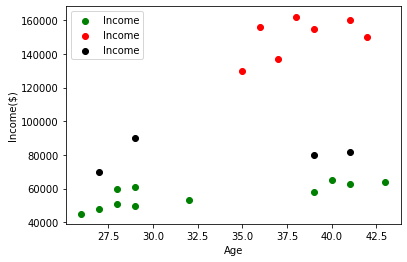

In [31]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1["Income"], color='green', label='Income')
plt.scatter(df2.Age, df2["Income"], color='red', label='Income')
plt.scatter(df3.Age, df3["Income"], color='black', label='Income')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(loc='upper left')

In [49]:
scaler=MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])
df
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income,cluter,cluster
0,Rob,0.058824,0.213675,2,2
1,Michel,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,0,0
3,ismail,0.117647,0.128205,0,0
4,kory,0.941176,0.897436,1,1


In [54]:
#KMeans
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age', 'Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [57]:
df['cluster']=y_predicted
df.drop('cluter', axis='columns', inplace=True)
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michel,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,ismail,0.117647,0.128205,1
4,kory,0.941176,0.897436,2


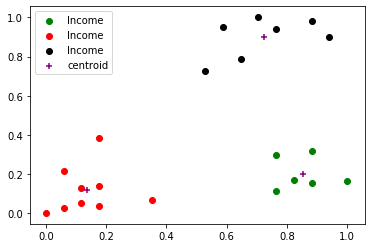

In [67]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age, df1["Income"], color='green', label='Income')
plt.scatter(df2.Age, df2["Income"], color='red', label='Income')
plt.scatter(df3.Age, df3["Income"], color='black', label='Income')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='+', label='centroid')
plt.legend()


In [60]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [71]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

In [72]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.22020960864009392,
 0.18284918484545845,
 0.1326541982724516,
 0.10383752586603558]

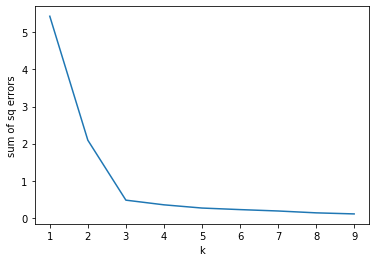

In [73]:
plt.xlabel('k')
plt.ylabel('sum of sq errors')
plt.plot(k_rng, sse)